# 0. Imports

In [278]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Base de dados

In [244]:
caminho = "data/nutrients_csvfile.csv"
dados_nutricao = pd.read_csv(caminho, decimal=",")
dados_nutricao = dados_nutricao.replace('t', 0)

# 2. Tratamento dos dados

In [245]:
dados_nutricao["Protein"] = dados_nutricao["Protein"].replace("-1","0", regex=True)
dados_nutricao["Protein"] = dados_nutricao["Protein"].astype(float)

# dropar linhas erradas
dados_nutricao.drop(205, inplace=True)
dados_nutricao.drop(82, inplace=True)

# coluna calorias (Calories)
dados_nutricao["Calories"] = dados_nutricao["Calories"].str.replace(",",".",regex=True)
# corrigindo as calorias das ervilhas
dados_nutricao.loc[134, "Calories"] = '36.4'
# considerando o máximo da faixa de calories das alcachofras
dados_nutricao.loc[91, "Calories"] = '44'
dados_nutricao["Calories"] = dados_nutricao["Calories"].astype(float)

#coluna gordura (Fat)
dados_nutricao["Fat"] = dados_nutricao["Fat"].astype(float)

# coluna gordura saturada (Sat.Fat)
# corrigindo a gordura saturada da carne de porco
dados_nutricao.loc[42, "Sat.Fat"] = '18.6'
# corrigindo a gordura saturada da beterraba
dados_nutricao.loc[100, "Sat.Fat"] = '0'
dados_nutricao["Sat.Fat"] = dados_nutricao["Sat.Fat"].astype(float)

# coluna fibra (Fiber)
# corrigindo o valor da fibra do peixe "cavalinha" 
dados_nutricao.loc[81, "Fiber"] = '0'
dados_nutricao["Fiber"] = dados_nutricao["Fiber"].astype(float)

#coluna carboidrato (Carbs)
dados_nutricao["Carbs"] = dados_nutricao["Carbs"].astype(float)

# dropar coluna "Measure" (a coluna gramas permite uma comparação melhor)
dados_nutricao.drop("Measure", axis = 1, inplace=True)

# 3. Gráfico comparativo

In [289]:
def grafico_comparativo(lista_alimentos, atributo):
    df = dados_nutricao.set_index('Food')
    df = df.loc[lista_alimentos]
    plt.figure(figsize = (8,6))
    plt.title(f"Comparação de {atributo}")
    sns.barplot(data = df, x = df.index, y = atributo)

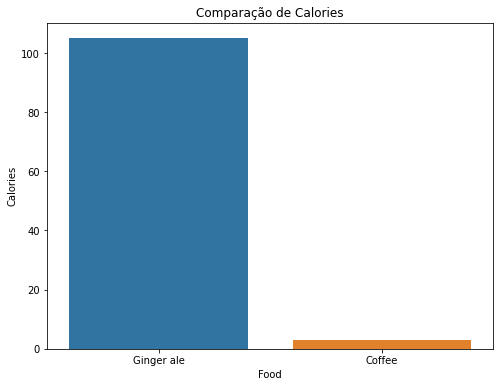

In [290]:
grafico_comparativo(["Ginger ale", "Coffee"], "Calories")

In [277]:
dados_nutricao

,Food,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,976.000,660.000,32.0,40.0,36.0,0.0,48.0,Dairy products
1,Milk skim,984.000,360.000,36.0,0.0,0.0,0.0,52.0,Dairy products
2,Buttermilk,246.000,127.000,9.0,5.0,4.0,0.0,13.0,Dairy products
3,"Evaporated, undiluted",252.000,345.000,16.0,20.0,18.0,0.0,24.0,Dairy products
4,Fortified milk,1.419,1.373,89.0,42.0,23.0,1.4,119.0,Dairy products
...,...,...,...,...,...,...,...,...,...
330,Fruit-flavored soda,346.000,161.000,0.0,0.0,0.0,0.0,42.0,"Drinks,Alcohol, Beverages"
331,Ginger ale,346.000,105.000,0.0,0.0,0.0,0.0,28.0,"Drinks,Alcohol, Beverages"
332,Root beer,346.000,140.000,0.0,0.0,0.0,0.0,35.0,"Drinks,Alcohol, Beverages"
333,Coffee,230.000,3.000,0.0,0.0,0.0,0.0,1.0,"Drinks,Alcohol, Beverages"
